In [119]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
import numpy as np
import io
import cv2
import pandas as pd
from scipy.spatial.distance import cdist

from collections import OrderedDict 


def closest_point(point, points):
    """ Find closest point from a list of points. """
    return points[cdist([point], points).argmin()]
def closest_distance(point, points):
    """ Find closest point from a list of points. """
    return cdist([point], points).min()
def match_value(df, col1, x, col2):
    """ Match value x from col1 row to value in col2. """
    return df[df[col1] == x][col2].values[0]

### Plot Route

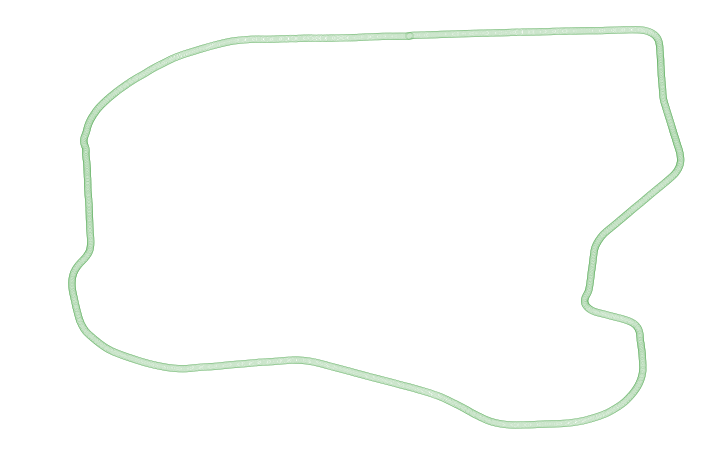

In [124]:
fig = plt.figure(figsize=(12,8))
g= plt.scatter(df['x'],df['y'],s=50, c='g',edgecolors='g',linewidths=0.1 )
plt.axis('off')
g.set_facecolor('none')

In [125]:
od = OrderedDict()
pred_csv_dir = '/home/ivslab/Desktop/Waypoints_Vision_CSV/bezier_round2.csv'

df_pred = pd.read_csv(pred_csv_dir)
# fig = plt.figure(figsize=(12,8))
csv_dir = '/home/ivslab/Desktop/NCTU_ROUND/nctu_round.csv'
df = pd.read_csv(csv_dir)

od["ground_csv"] = csv_dir
od["pred_csv"] = pred_csv_dir
od["segment"] = []

for i in range(len(df_pred)//50):
    # Create a figure that pyplot does not know about.
    fig = Figure(figsize=(12,8))
    canvas = FigureCanvas(fig)
    segment = (50*i,50*i+50)
    ax  = fig.add_subplot(111)
    # marker_style = {'filled_markers':'o',
    #  'fillstyles ':'none'}
    ax.scatter(df['x'],df['y'],s=50, c='r',edgecolors='g',linewidths=0.1 )
    ax.set_facecolor('none')
    ax.scatter(df_pred['X'][segment[0]:segment[1]],df_pred['Y'][segment[0]:segment[1]],s=50, c='g',edgecolors='r',linewidths=0.1)
    ax.set_facecolor('none')
    

    df1 = df
    df2 = df_pred[segment[0]:segment[1]]

    df1['point'] = [(x, y) for x,y in zip(df1['x'], df1['y'])]
    df2['point'] = [(x, y) for x,y in zip(df2['X'], df2['Y'])]

    df2['closest'] = [closest_point(x, list(df1['point'])) for x in df2['point']]
    df2['distance'] = [closest_distance(x, list(df1['point'])) for x in df2['point']]
    ax.set_title('error:{}'.format(df2.distance.mean()))
    print(df2.distance.mean())
    print('-------------------')
    canvas.draw()
    # grab the pixel buffer and dump it into a numpy array
    X = np.array(canvas.renderer.buffer_rgba())

    
    size = (fig.canvas.get_width_height()[1],fig.canvas.get_width_height()[0],4)
    ax2.imshow(X.reshape(size))
    
#     plt.plot(df2.distance)
    segment_od = OrderedDict()
    segment_od["range"] = segment
    segment_od["error"] = df2.distance.mean()
    segment_od["route_img"] =X.reshape(size) 
    od["segment"].append(segment_od)
    
    

/home/ivslab/.local/lib/python2.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ivslab/.local/lib/python2.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ivslab/.local/lib/python2.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

0.5698360741974218
-------------------
0.5549438585723971
-------------------
0.6196204523623174
-------------------
0.7015259366462898
-------------------
1.1622526894255025
-------------------
1.352433694833982
-------------------
0.6346599856605732
-------------------
0.7071745496710616
-------------------
0.9290474677567712
-------------------
0.8071689909829164
-------------------
0.877530051309571
-------------------
0.5668398233646623
-------------------
0.8545934387192495
-------------------
1.129336477309908
-------------------
0.8002011634490309
-------------------
0.9766250917910558
-------------------
0.6798246730257931
-------------------
1.2921686914715855
-------------------
0.925494777182255
-------------------
1.0008314318982854
-------------------
1.0744274630767854
-------------------
0.9667810114363888
-------------------
0.6189706971378324
-------------------
0.5234264450853399
-------------------
0.5350224989227769
-------------------
0.6214843996441258
----------

In [126]:
for i,seg in enumerate(od['segment']):
    cv2.imwrite('/home/ivslab/Desktop/Waypoints_Vision_CSV/low_angle/segment{}.png'.format(i),seg['route_img'])

In [105]:
od['segment'][1]["range"]

(50, 100)

In [79]:
X.shape

(497664,)

In [80]:
fig.

<Figure size 432x288 with 0 Axes>

In [73]:





segment_od["route_img"].shape


(17838,)

0.795086948179669

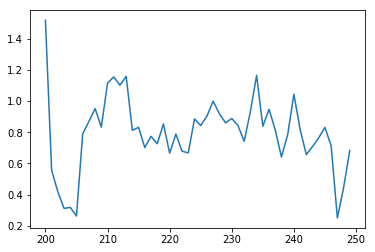

In [66]:
od

OrderedDict([('ground_csv', '/home/ivslab/Desktop/NCTU_ROUND/nctu_round.csv'),
             ('pred_csv',
              '/home/ivslab/Desktop/Waypoints_Vision_CSV/bspline_round.csv'),
             ('segment', [])])